## Table of Contents
* [1. Introduction](#chapter1)
    * [1.1 Description](#section1_1)
    * [1.2 Main aims](#section1_2)
    * [1.3 Data description](#section1_3)
* [2. Preparation](#chapter2)
    * [2.1 Importing libs](#section2_1)
    * [2.2 Data import, research and preparation](#section2_2) 
* [3. Exploratory data analysis](#chapter3)
    * [3.1 Analysis of errors, inconsistencies, and outliers in data](#section3_1)
    * [3.2 Analysis of customer characteristics](#section3_2)
    * [3.3 Investigation of correlations in data](#section3_3)
    * [3.4 Analysis of user geography](#section3_4)    
    * [3.5 Analysis of customer activity](#section3_5)       
* [4. User segmentation](#chapter4)
    * [4.1 Number of bank products](#section4_1)
    * [4.2 Customer activity](#section4_2)
    * [4.3 Property ownership](#section4_3)
    * [4.4 Age grouping](#section4_4)          
* [5. Hypothesis testing](#chapter5)
    * [Hypothesis 1: Income difference between customers with one and two bank products](#section5_1)
    * [Hypothesis 2: income difference between churned and active customers](#section5_2)
    * [Hypothesis 3: The impact of property ownership on a customer's credit score](#section5_3)    
* [6. Results and recommendations](#chapter6)    

# 1. Introduction <a class="anchor" id="chapter1"></a>

### 1.1 Description <a class="anchor" id="section1_1"></a>

The regional bank needs to determine the profile of users who use its services. In addition, the bank needs to understand which users should be identified as prone to churn.

### 1.2 Main aims: <a class="anchor" id="section1_2"></a>

* Segment the bank's client and understand which user characteristics affect their loyalty to identify areas to strengthen churn management.
* Analyze the bank's clients and segment users based on the number of consumed products.

### 1.3 Data description <a class="anchor" id="section1_3"></a>

Dataset with the bank's client attributes.

File **bank_dataset.csv** includes:
- `userid` — user ID,
- `score` — credit scoring points,
- `City` — city,
- `Gender` — gender,
- `Age` — age,
- `Objects` — number of objects in ownership,
- `Balance` — account balance,
- `Products` — number of bank products used by the client,
- `CreditCard` — has a credit card or not,
- `Loyalty` — active client or not,
- `estimated_salary` — estimated salary of the client,
- `Churn` — churned or not.

# 2. Preparation <a class="anchor" id="chapter2"></a>

### 2.1 Importing libs <a class="anchor" id="section2_1"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
import scipy.stats as st
import warnings
warnings.filterwarnings("ignore")

### 2.2 Data import, research and preparation <a class="anchor" id="section2_2"></a>

In [2]:
# Importing data
df = pd.read_csv('bank_dataset.csv')

In [3]:
# Checking data
display(df.head())
print('Number of unique users:',len(df['userid'].unique()),'\n')

# Checking data types and duplicates
print(df.info(),'Number of explicit duplicates:' + str(df.duplicated().sum()))
display(df.describe(include='all'))

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0


Number of unique users: 10000 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB
None Number of explicit duplicates:0


,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
count,1.000000e+04,10000.000000,10000,10000,10000.000000,10000.000000,6383.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Ярославль,М,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,1.573368e+07,650.528800,NaN,NaN,38.921800,5.012800,119827.493793,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,NaN,NaN,10.487806,2.892174,30095.056462,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.560844e+07,350.000000,NaN,NaN,18.000000,0.000000,3768.690000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.567126e+07,584.000000,NaN,NaN,32.000000,3.000000,100181.975000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.573347e+07,652.000000,NaN,NaN,37.000000,5.000000,119839.690000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.579597e+07,718.000000,NaN,NaN,44.000000,7.000000,139512.290000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [4]:
# Translating genders
df['Gender'] = df['Gender'].replace({'Ж': 'W', 'М': 'M'})

# Translating cities
df['City'] = df['City'].replace({'Рыбинск': 'Rybinsk', 'Ростов Великий': 'Rostov Veliky','Ярославль': 'Yaroslavl' })

In [5]:
# Checking unique categorical data
print(df['City'].unique())
print(df['Gender'].unique())

['Yaroslavl' 'Rybinsk' 'Rostov Veliky']
['W' 'M']


**Brief conclusions:**
1. The dataset contains 10,000 rows, each representing a unique user.
2. There are missing values in the balances. For the purposes of analysis, we will assume that a missing balance indicates a balance of 0.

In [6]:
# Renaming columns to a convenient format
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [7]:
# Changing data types
df = df.astype({'userid':'object',
                'score':'int16',
                'age':'int16',
                'objects':'int16',
                'products':'int16',
                'creditcard':'int16',
                'loyalty':'int16',
                'churn':'int16',
                })

In [8]:
# Checking missing data in balances by cities
for i in df['city'].unique():
    num_na = df[df['city'] == i]['balance'].isna().sum()
    print(i+',','number of missing balances:',num_na, '/', round(num_na/len(df[df['city'] == i]),4)*100,'%')

Yaroslavl, number of missing balances: 2418 / 48.22 %
Rybinsk, number of missing balances: 1199 / 48.41 %
Rostov Veliky, number of missing balances: 0 / 0.0 %


In [9]:
# Checking missing data in balances by cities for non-churned users
for i in df['city'].unique():
    num_na = df[(df['city'] == i) & (df['churn'] == 0)]['balance'].isna().sum()
    total_in_city = len(df[(df['city'] == i) & (df['churn'] == 0)])
    print(i+',','number of missing balances:',num_na, '/', round(num_na/total_in_city,4)*100,'%')

Yaroslavl, number of missing balances: 2081 / 49.5 %
Rybinsk, number of missing balances: 1036 / 50.19 %
Rostov Veliky, number of missing balances: 0 / 0.0 %


In [10]:
# Checking missing balances by attributes
features = ['gender', 'objects', 'products', 'creditcard', 'loyalty', 'churn']

for f in features:
    print("\n"+f+":")
    for i in sorted(df[f].unique()):
        num_na = df[df[f] == i]['balance'].isna().sum()
        print(str(i)+',','number of missing balances:',num_na, '/', round(num_na/len(df[df[f] == i])*100,2),'%')


gender:
M, number of missing balances: 1963 / 35.97 %
W, number of missing balances: 1654 / 36.41 %

objects:
0, number of missing balances: 137 / 33.17 %
1, number of missing balances: 349 / 33.72 %
2, number of missing balances: 382 / 36.45 %
3, number of missing balances: 352 / 34.89 %
4, number of missing balances: 369 / 37.31 %
5, number of missing balances: 374 / 36.96 %
6, number of missing balances: 367 / 37.95 %
7, number of missing balances: 386 / 37.55 %
8, number of missing balances: 363 / 35.41 %
9, number of missing balances: 360 / 36.59 %
10, number of missing balances: 178 / 36.33 %

products:
1, number of missing balances: 905 / 17.8 %
2, number of missing balances: 2600 / 56.64 %
3, number of missing balances: 98 / 36.84 %
4, number of missing balances: 14 / 23.33 %

creditcard:
0, number of missing balances: 1025 / 34.8 %
1, number of missing balances: 2592 / 36.74 %

loyalty:
0, number of missing balances: 1744 / 35.97 %
1, number of missing balances: 1873 / 36.36 

Explicit duplicates were checked during the initial review, let's look at implicit duplicates. Among the available columns, implicit duplicates can be hidden in user IDs, while the other columns are either filled with boolean values or the correct number of features (3 cities, 2 genders).

In [11]:
# Checking duplicates in IDs
df['userid'].nunique()

10000

**Brief conclusions:**
1. No implicit duplicates were found, all 10,000 users have a unique ID;
2. The presence of missing values is influenced by the city. For example, there are no missing values in Rostov Veliky, while there are about 50% of them in Yaroslavl and Rybinsk. It is likely that users in these cities are offered different product lines that can be obtained without a bank balance;
3. The number of missing balance values is noticeably higher for users with 2 products, which can be explained by a higher proportion of users with 2 products in Yaroslavl and Rybinsk;
4. It is unlikely that there are no data on balances in the bank's database, so from now on we will denote missing values as zero balances.

In [12]:
df['balance'] = df['balance'].fillna(0)

# 3. Exploratory data analysis <a class="anchor" id="chapter3"></a>

In [13]:
# Function for grouping data and % calculation
def table_percentage(col_group,df=None,group_total=None):
    count_table = df.groupby(col_group).agg({'userid':'count'}).reset_index().rename(columns={'userid':'count'})
    
    if group_total == None:
        sum_table = df.groupby(col_group[0]).agg({'userid':'count'}).reset_index().rename(columns={'userid':'total'})
        final_table = count_table.merge(sum_table, on=col_group[0])
    else:
        sum_table = df.groupby(group_total).agg({'userid':'count'}).reset_index().rename(columns={'userid':'total'})
        final_table = count_table.merge(sum_table, on=group_total)
    
    final_table['%'] = round((final_table['count']/final_table['total']*100),2)
    return final_table

### 3.1 Analysis of errors, inconsistencies, and outliers in data <a class="anchor" id="section3_1"></a>

#### Taking a look at the distribution of data among users in terms of churned and retained.

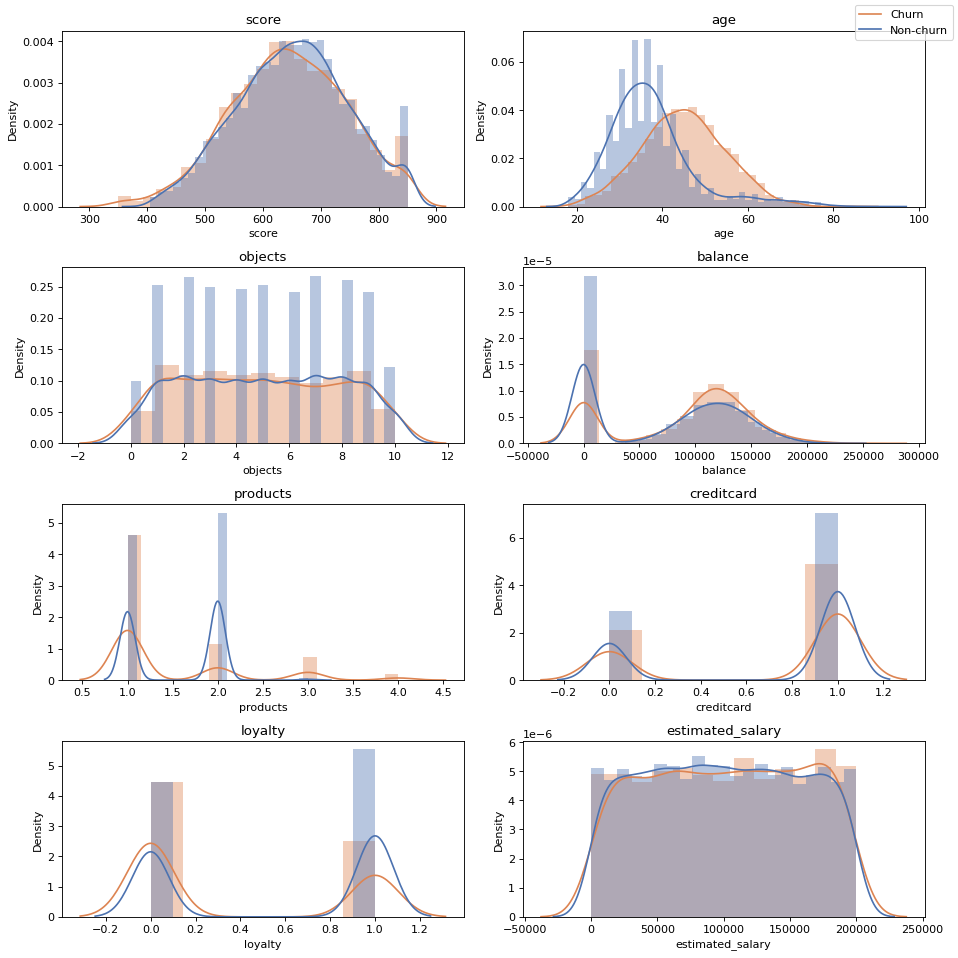

In [14]:
# Setting a palette
palette = sns.color_palette('deep')

# Setting city names
cities = df['city'].unique()

# Setting attributes for analysis:
prm = ['score',
       'age',
       'objects',
       'balance',
       'products',
       'creditcard',
       'loyalty',
       'estimated_salary'      
      ]


fig = plt.figure(figsize=(12, 12), dpi=80)

for i, p in enumerate(prm):
    for churn in df['churn'].unique():
        group_to_plot = df.query('churn == @churn')
        sns.distplot(group_to_plot[p],  
                     ax = plt.subplot(4, 2, i + 1),
                     color=palette[churn],
                     kde=True
                    )
    plt.title(p)
plt.tight_layout() 
fig.legend(labels=['Churn','Non-churn'])
plt.show()    

In [15]:
display(df[df['age']>80].sort_values(by='age'))
print(df[df['age']>80].sort_values(by='age')['estimated_salary'].mean())

,userid,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn
4931,15815077,682,Rostov Veliky,M,81,6,122029.15,1,1,1,50783.88,0
7526,15843290,850,Yaroslavl,W,81,1,0.00,2,1,1,59568.24,0
7956,15774305,850,Yaroslavl,M,81,5,0.00,2,1,1,44827.47,0
9080,15663179,711,Yaroslavl,W,81,6,0.00,2,1,1,72276.24,0
766,15853600,700,Yaroslavl,W,82,2,0.00,2,0,1,182055.36,0
9309,15664380,678,Rostov Veliky,M,83,6,123356.63,1,0,1,92934.41,0
3387,15840760,537,Rostov Veliky,M,84,8,92242.34,1,1,1,186235.98,0
3531,15695987,408,Yaroslavl,W,84,8,87873.39,1,0,0,188484.52,1
3033,15620742,787,Yaroslavl,W,85,10,0.00,2,1,1,116537.96,0
2458,15856039,513,Rybinsk,M,88,10,0.00,2,1,1,52952.24,0


106388.09333333334


**Brief conclusion:**<br>
1. When broken down by churned and retained customers, age and number of products stand out as significant indicators. There are minor differences in the balances of the two groups. No significant differences are observed in other indicators.
2. Users of the bank are mostly represented by the age group of 30-45 years old.
3. The data indicates a reasonable age distribution of users, with 12 users being 80+. Among them, there are users with salaries almost twice as high as the average.

In [16]:
# Looking at minimal salaries
df.sort_values(by='estimated_salary').head(15)

,userid,score,city,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn
2362,15833789,709,Rostov Veliky,M,45,4,122917.71,1,1,1,11.58,1
9647,15722429,625,Yaroslavl,M,31,5,0.00,2,0,1,90.07,0
9010,15829199,645,Rostov Veliky,W,59,8,121669.93,2,0,0,91.75,1
5548,15682398,710,Yaroslavl,M,38,2,0.00,2,1,0,96.27,0
4989,15645587,629,Yaroslavl,M,40,9,0.00,1,1,0,106.67,0
7565,15666105,708,Yaroslavl,M,52,10,105355.81,1,1,0,123.07,1
2498,15691471,718,Yaroslavl,M,37,8,0.00,2,1,1,142.81,0
8722,15761403,621,Yaroslavl,M,35,7,87619.29,1,1,0,143.34,0
4774,15683157,811,Yaroslavl,W,35,7,0.00,1,1,1,178.19,0
1451,15726934,551,Yaroslavl,W,38,10,0.00,2,1,1,216.27,0


In [17]:
# Checking 1st and 5th percentile salaries
np.percentile(df[df['estimated_salary'].isnull() == False]['estimated_salary'],[1,5])

array([1842.8253, 9851.8185])

In [18]:
df = df[df['estimated_salary'] > 10000]

**Brief conclusion:**<br>
It seems that many users in the data set have reported unrealistic salaries, which could have a negative impact on further analysis. Let's assume a salary of 10,000 rubles as the minimum for analysis and exclude approximately 5% of users who have a salary below this threshold.

### 3.2 Investigation of correlations in data <a class="anchor" id="section3_2"></a>

#### To build correlations between features, it is necessary to update the categorical data: we will recode cities and label men and women as 0 and 1 respectively.

In [19]:
# Encoding cities
encoder  = OneHotEncoder()
df_enc = pd.DataFrame(encoder.fit_transform(df[['city']]).todense(), 
                                columns=encoder.get_feature_names())
df = df.join(df_enc)

# Changing genders to 1 and 0
df['gender'].replace({'W':1,'M':0},inplace=True)
df = df.astype({'gender':'int16'})

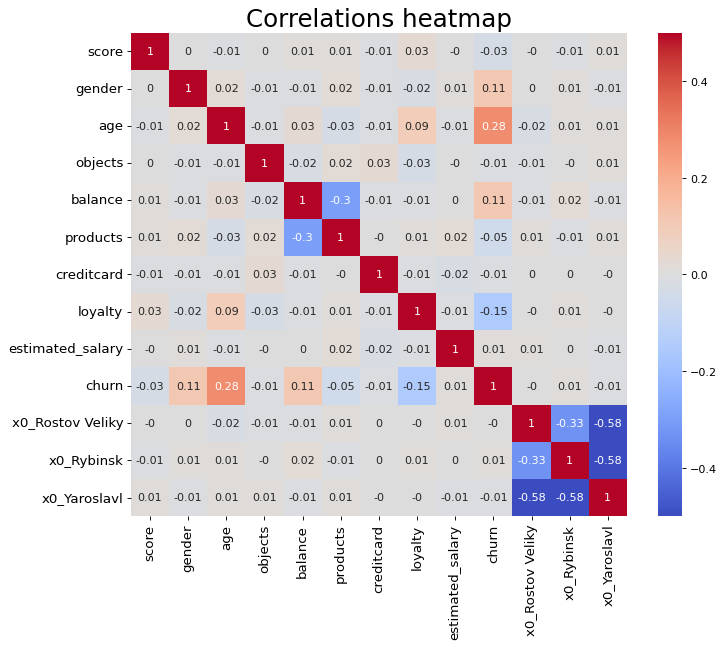

In [20]:
# Creating correlatio, matrix
corr_m = round(df.corr(),2)

# Creating heatmap of corelations
plt.figure(figsize=(10,8), dpi= 80)
sns.heatmap(corr_m, xticklabels=df.corr().columns, yticklabels=corr_m.columns,vmin=-0.5, vmax=0.5, cmap='coolwarm', center=0, annot=True)

plt.title('Correlations heatmap', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

**Brief conclusions:**
1. There is a correlation between age and churn again;
2. There is a small inverse relationship between the number of products and the balance of users;
3. Women are slightly more likely to churn than men.

### 3.3 Analysis of client attributes <a class="anchor" id="section3_3"></a>

In [21]:
# Creating a table with average and median values by cities and churn status
print('Average values:')
display(round(df.groupby(['city', 'churn']).mean(),2))
print('\nMedian values:')
display(round(df.groupby(['city', 'churn']).median(),2))

Average values:


score  gender    age  objects    balance  products  \
city          churn                                                        
Rostov Veliky 0      653.42    0.44  37.33     5.02  119604.92      1.55   
              1      648.49    0.55  44.86     5.01  120291.22      1.46   
Rybinsk       0      652.41    0.41  37.91     5.13   59828.14      1.54   
              1      648.47    0.56  44.26     4.70   72459.12      1.51   
Yaroslavl     0      651.29    0.43  37.26     5.02   60998.96      1.54   
              1      640.62    0.56  45.08     5.02   71094.44      1.47   

                     creditcard  loyalty  estimated_salary  x0_Rostov Veliky  \
city          churn                                                            
Rostov Veliky 0            0.72     0.56         107061.93              0.25   
              1            0.71     0.37         104498.26              0.25   
Rybinsk       0            0.70     0.57         103545.92              0.26   
              1            0.67     0.34         108674.78              0.26   
Yaroslavl     0            0.71     0.55         104585.94              0.25   
              1            0.71     0.37         107339.69              0.25   

                     x0_Rybinsk  x0_Yaroslavl  
city          churn                            
Rostov Veliky 0            0.26          0.49  
              1            0.27          0.49  
Rybinsk       0            0.24          0.50  
              1            0.26          0.49  
Yaroslavl     0            0.24          0.51  
              1            0.24          0.51


Median values:


score  gender  age  objects    balance  products  \
city          churn                                                     
Rostov Veliky 0        653       0   36        5  120598.16         2   
              1        647       1   45        5  118652.34         1   
Rybinsk       0        652       0   36        5    7131.40         2   
              1        650       1   44        5   79035.95         1   
Yaroslavl     0        655       0   36        5   58722.34         2   
              1        643       1   45        5   80090.93         1   

                     creditcard  loyalty  estimated_salary  x0_Rostov Veliky  \
city          churn                                                            
Rostov Veliky 0               1        1         106780.48               0.0   
              1               1        0         104415.72               0.0   
Rybinsk       0               1        1         102371.02               0.0   
              1               1        0         111342.66               0.0   
Yaroslavl     0               1        1         103377.13               0.0   
              1               1        0         108348.94               0.0   

                     x0_Rybinsk  x0_Yaroslavl  
city          churn                            
Rostov Veliky 0             0.0           0.0  
              1             0.0           0.0  
Rybinsk       0             0.0           1.0  
              1             0.0           0.0  
Yaroslavl     0             0.0           1.0  
              1             0.0           1.0

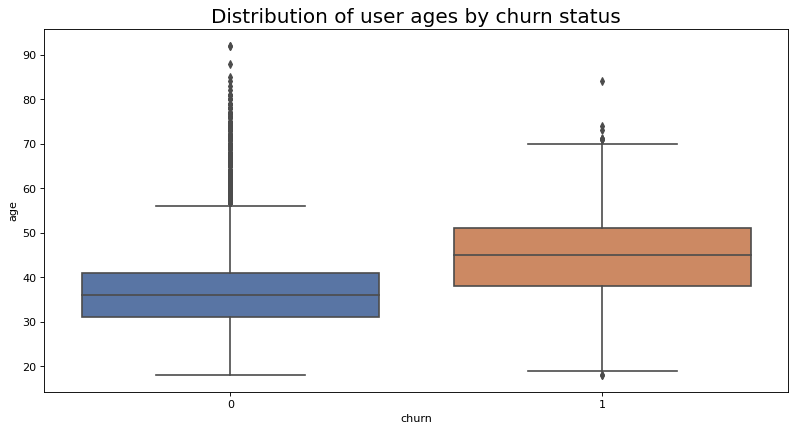

In [22]:
# Проверим возраст ушедших и оставшихся пользователей
plt.figure(figsize=(12, 6), dpi = 80)
sns.boxplot(x=df['churn'],
            y=df['age'],
            data = df,
            palette = 'deep'
           )
plt.title('Distribution of user ages by churn status', fontsize=18)
plt.show()

**Brief conclusions:**
1. There are no significant differences in scoring between cities, but for users in churn, it is lower on average;
2. Users who churn are on average 7-9 years older than those who stay;
3. Users, regardless of city and churn status, own an average of around 5 objects;
4. Users in churn had a slightly lower number of products on average.

### 3.4 Analysis of user geography <a class="anchor" id="section3_4"></a>

In [23]:
print('Average values:')
display(round(df.groupby(['city']).mean(),2))

Average values:


,score,gender,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,x0_Rostov Veliky,x0_Rybinsk,x0_Yaroslavl
city,,,,,,,,,,,,,
Rostov Veliky,651.84,0.47,39.74,5.02,119825.04,1.52,0.72,0.50,106239.66,0.32,0.25,0.26,0.49
Rybinsk,651.75,0.44,38.97,5.06,61937.78,1.54,0.70,0.53,104402.54,0.17,0.26,0.24,0.50
Yaroslavl,649.54,0.45,38.54,5.02,62652.18,1.53,0.71,0.52,105036.89,0.16,0.25,0.24,0.51


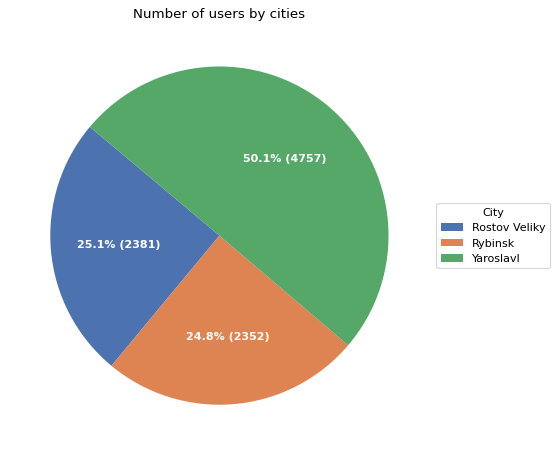

In [24]:
# Function for labels setting
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}% ({:d})".format(pct, absolute)

# Calculating number of users by cities
users_city = df.groupby('city').size().reset_index(name='count')
fig, ax = plt.subplots(figsize=(12, 7), subplot_kw=dict(aspect="equal"), dpi= 80)

data = users_city['count']
categories = users_city['city']

wedges, texts, autotexts = ax.pie(data, 
                                  autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"), 
                                  colors=palette,
                                 startangle=140,
                                 )

ax.legend(wedges, categories, title="City", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(autotexts, size=10, weight=700)
ax.set_title("Number of users by cities")
plt.show()

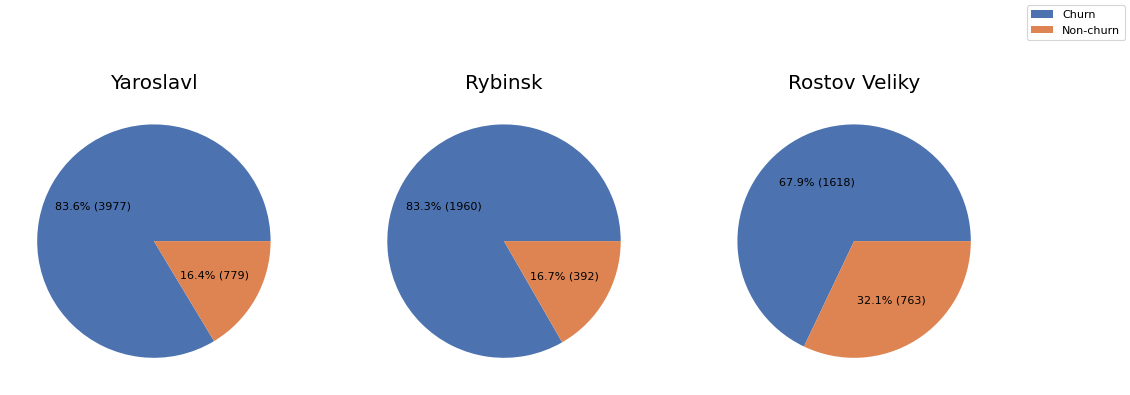

In [25]:
# Checking churn ratio by cities
df_churn_city = table_percentage(['city','churn'],df = df)

fig = plt.figure(figsize=(16,6), dpi=80)

categories = df_churn_city['churn']

for i, city in enumerate(df['city'].unique()):
    group_to_plot = df_churn_city.query('city == @city')
    ax = plt.subplot2grid((1,3),(0,i))
    wedges, texts, autotexts = plt.pie(group_to_plot['%'],
            colors=palette,
            autopct=lambda pct: func(pct, group_to_plot['count']),)
    plt.title(city, fontsize=18)

fig.legend(labels=['Churn','Non-churn'])
plt.show()    

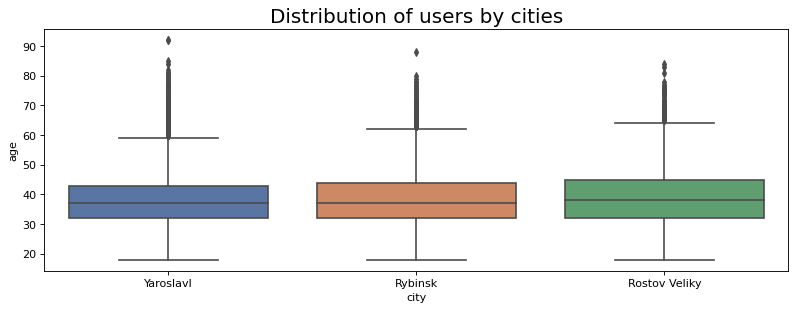

In [26]:
# Checking distribution of users by cities
plt.figure(figsize=(12, 4), dpi = 80)
sns.boxplot(x=df['city'],
            y=df['age'],
            data = df,
            palette = 'deep'
           )
plt.title('Distribution of users by cities', fontsize=18)
plt.show()

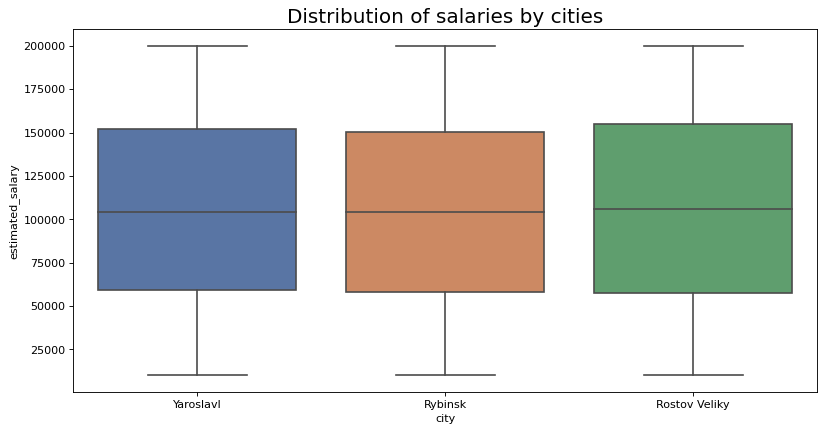

In [27]:
# Checking distribution of salaries by cities
plt.figure(figsize=(12, 6), dpi = 80)
sns.boxplot(x=df['city'],
            y=df['estimated_salary'],
            data = df,
            palette = 'deep'
           )
plt.title('Distribution of salaries by cities', fontsize=18)
plt.show()

**Brief conclusion:** salaries are distributed similarly across cities. The age of users in Rostov Veliky is higher than in other cities.

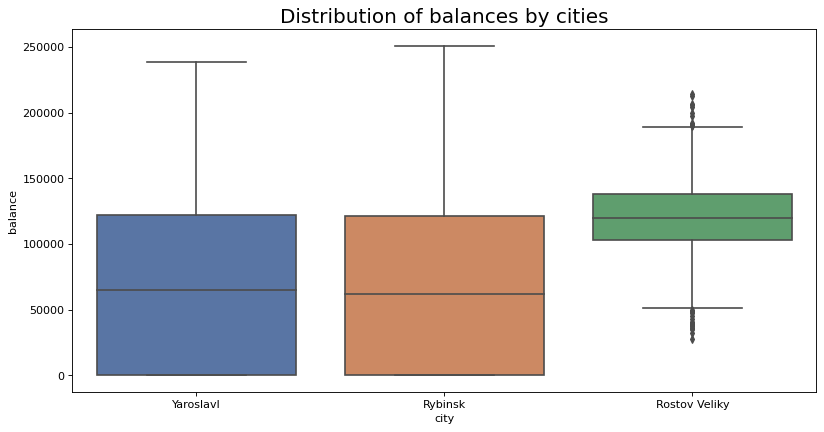

In [28]:
# Checking distribution of balances by cities
plt.figure(figsize=(12, 6), dpi = 80)
sns.boxplot(x=df['city'],
            y=df['balance'],
            data = df,
            palette = 'deep'
           )
plt.title('Distribution of balances by cities', fontsize=18)
plt.show()

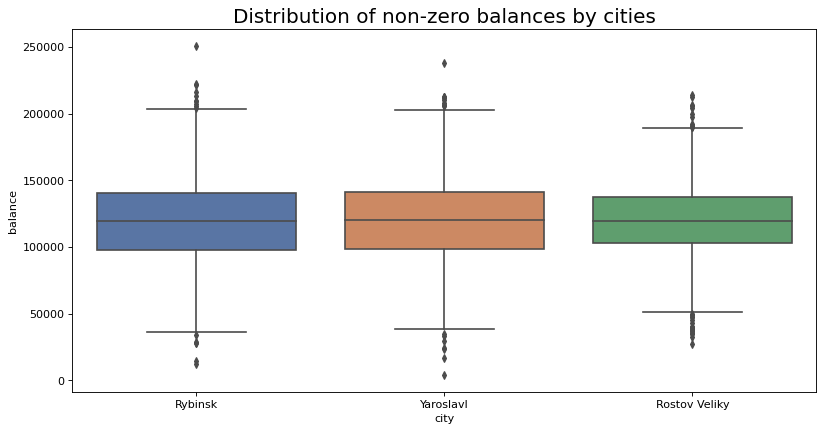

In [29]:
# Checking distribution of non-zero balances by cities
plt.figure(figsize=(12, 6), dpi = 80)
sns.boxplot(x=df[df['balance'] > 0]['city'],
            y=df[df['balance'] > 0]['balance'],
            data = df[df['balance'] > 0],
            palette = 'deep'
           )
plt.title('Distribution of non-zero balances by cities', fontsize=18)
plt.show()

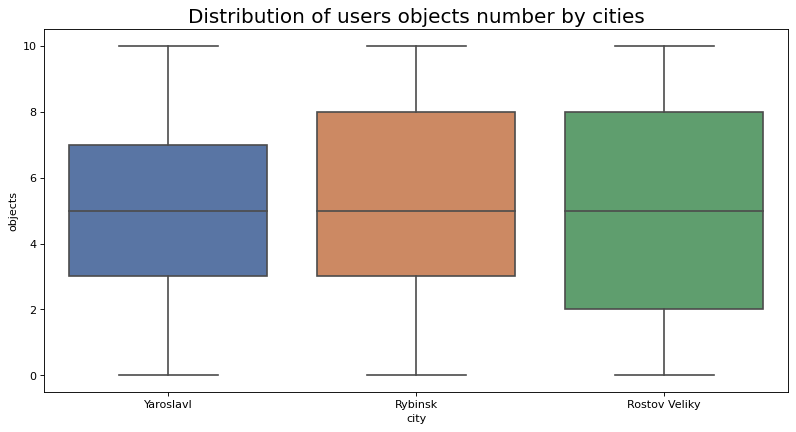

In [30]:
# Checking distribution of users objects number by cities
plt.figure(figsize=(12, 6), dpi = 80)
sns.boxplot(x=df['city'],
            y=df['objects'],
            data = df,
            palette = 'deep'
           )
plt.title('Distribution of users objects number by cities', fontsize=18)
plt.show()

**Brief conclusions:**<br>
1. The largest number of users are in Yaroslavl, almost 50%;
2. The strongest user churn is observed in Rostov Veliky (32%), while in other cities it is around 16.5%;
3. In Rybinsk and Yaroslavl, a significant proportion of users have zero balance. If the missing data was indeed zero balances for users, then additional analysis is needed to determine the reasons for such a high number of clients with zero balance in Yaroslavl and Rybinsk;
4. When selecting users with non-zero balances, the differences between cities are minimal.

### 3.5 Analysis of customer activity <a class="anchor" id="section3_5"></a>

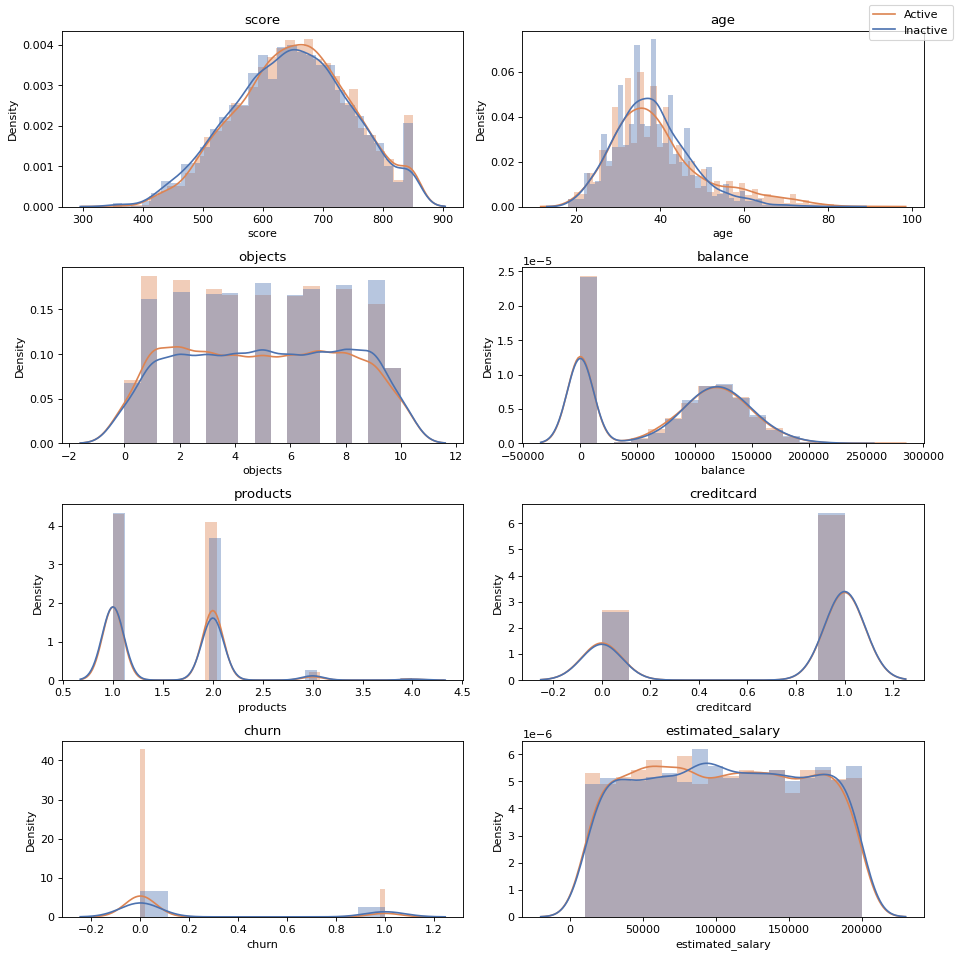

In [31]:
# Setting parameters:
prm = ['score',
       'age',
       'objects',
       'balance',
       'products',
       'creditcard',
       'churn',
       'estimated_salary'      
      ]
palette = sns.color_palette('deep')[0:2]

fig = plt.figure(figsize=(12, 12), dpi=80)

for i, p in enumerate(prm):
    for loyalty in df['loyalty'].unique():
        group_to_plot = df.query('loyalty == @loyalty')
        sns.distplot(group_to_plot[p],  
                     ax = plt.subplot(4, 2, i + 1),
                     color=palette[loyalty],
                     kde=True
                    )
    plt.title(p)
plt.tight_layout() 
fig.legend(labels=['Active','Inactive'])
plt.show()    

**Brief conclusion:** there are no significant deviations in the indicators of active and inactive users.

# 4. User segmentation <a class="anchor" id="chapter4"></a>

### 4.1 Number of bank products <a class="anchor" id="section4_1"></a>

In [32]:
df['products'] = df['products'].astype('str')

In [33]:
# Grouping dataset by product categories
df_products = df.groupby('products').agg({'userid':'count'}).reset_index()
df_products['%'] = round(df_products['userid']/df_products['userid'].sum()*100,2)
df_products

,products,userid,%
0,1,4834,50.93
1,2,4350,45.83
2,3,251,2.64
3,4,57,0.60


In [34]:
# Grouping dataset by product categories and churn status
df_products_group = table_percentage(['products','churn'],df = df)
df_products_group

,products,churn,count,total,%
0,1,0,3497,4834,72.34
1,1,1,1337,4834,27.66
2,2,0,4015,4350,92.30
3,2,1,335,4350,7.70
4,3,0,44,251,17.53
5,3,1,207,251,82.47
6,4,1,57,57,100.00


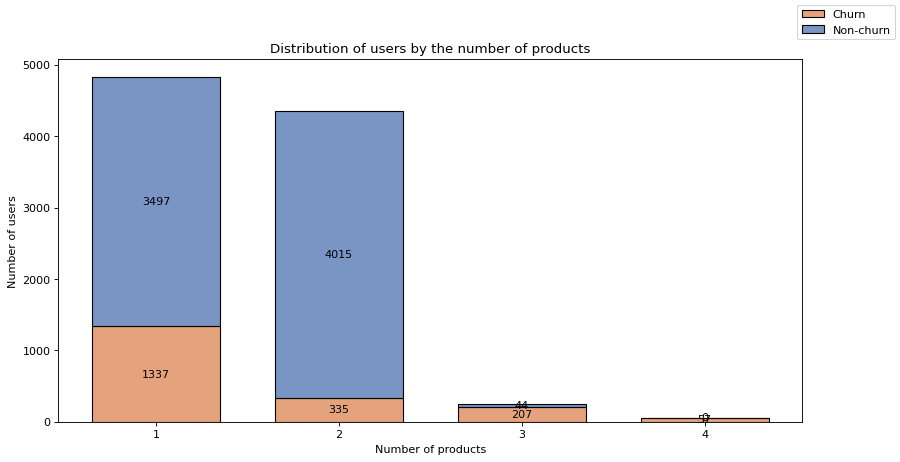

In [35]:
fig,axl = plt.subplots(figsize=(12, 6), dpi = 80)

ax = sns.histplot(df_products_group,
             x='products',
             hue='churn',
             weights='count',
             multiple='stack',
             shrink=0.7,
             palette = ('deep'),
             legend = None
             )

plt.xlabel('Number of products')
plt.ylabel('Number of users')
plt.title('Distribution of users by the number of products')

for c in ax.containers:
    ax.bar_label(c, label_type = 'center')
    
fig.legend(labels=['Churn','Non-churn'])
plt.show()

There is a bias towards users with 1 or 2 products, and the lowest churn rate is observed among users with 2 products.

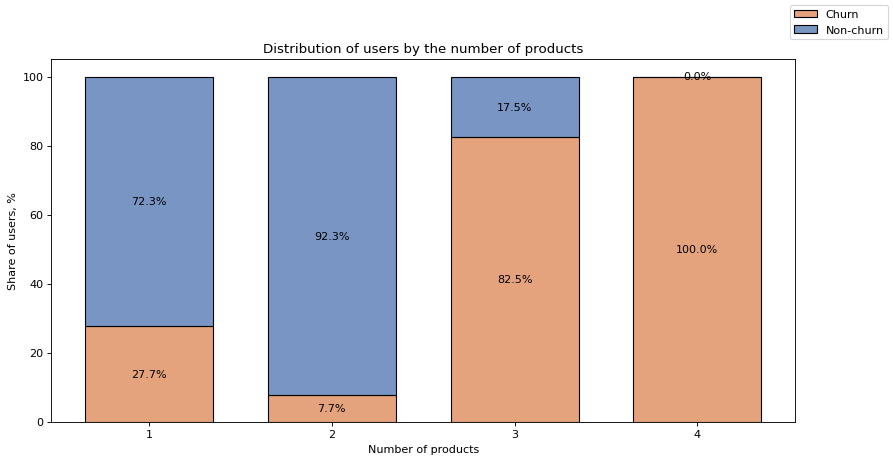

In [36]:
fig,axl = plt.subplots(figsize=(12, 6), dpi = 80)

ax = sns.histplot(df_products_group,
             x='products',
             hue='churn',
             weights='%',
             multiple='stack',
             shrink=0.7,
             palette = ('deep'),
             legend = None
             )

plt.xlabel('Number of products')
plt.ylabel('Share of users, %')
plt.title('Distribution of users by the number of products')

for c in ax.containers:
    ax.bar_label(c, fmt='%0.1f%%',label_type = 'center')
    
fig.legend(labels=['Churn','Non-churn'])
plt.show()

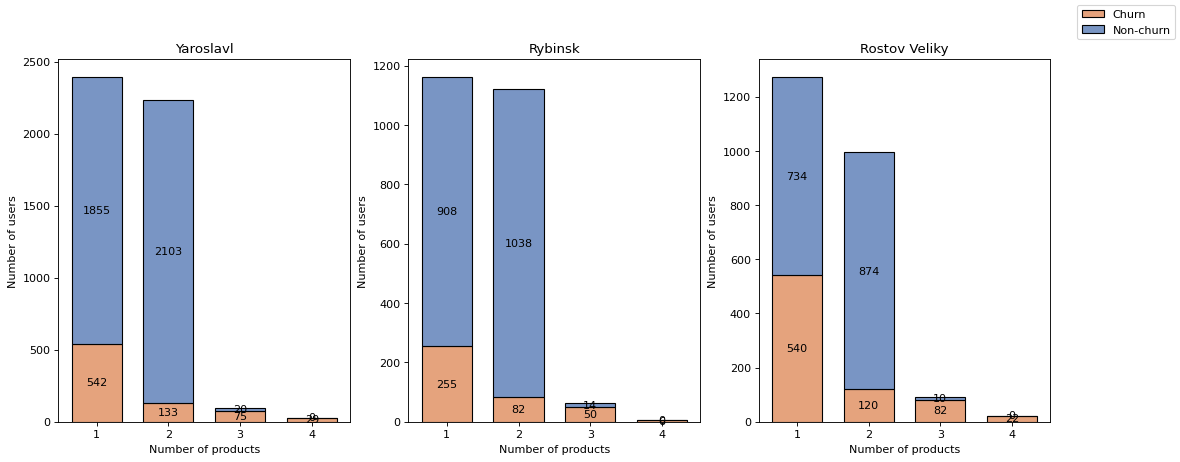

In [37]:
df_products_city = table_percentage(['city','churn','products'],df = df)
fig,axl = plt.subplots(figsize=(16, 6), dpi = 80)

for i, city in enumerate(cities):
    
    df_sub = df_products_city.query('city == @city')
    ax = sns.histplot(df_sub,
                 x='products',
                 hue='churn',
                 weights='count',
                 multiple='stack',
                 shrink=0.7,
                 palette = ('deep'),
                 ax = plt.subplot(1, 3, i + 1),
                 legend = None
                 )
    plt.title(city)
    plt.xlabel('Number of products')
    plt.ylabel('Number of users')
    for c in ax.containers:
        ax.bar_label(c, label_type = 'center')

fig.legend(labels=['Churn','Non-churn'])
plt.show()

It is noticeable that the situation with the churn rate is significantly worse in the city of Rostov Veliky across all segments.

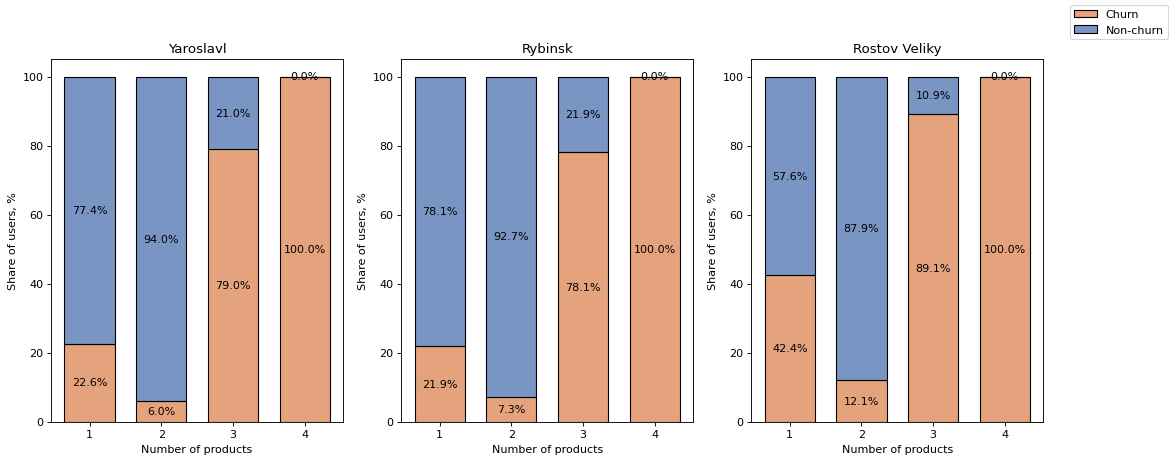

In [38]:
df_products_city_distr = table_percentage(['city','products','churn'], df=df, group_total=['city','products'])
fig,axl = plt.subplots(figsize=(16, 6), dpi = 80)

for i, city in enumerate(cities):
    
    df_sub = df_products_city_distr.query('city == @city')
    ax = sns.histplot(df_sub,
                 x='products',
                 hue='churn',
                 weights='%',
                 multiple='stack',
                 shrink=0.7,
                 palette = ('deep'),
                 ax = plt.subplot(1, 3, i + 1),
                 legend = None
                 )
    plt.title(city)
    plt.xlabel('Number of products')
    plt.ylabel('Share of users, %')
    for c in ax.containers:
        ax.bar_label(c,fmt='%0.1f%%', label_type = 'center')

fig.legend(labels=['Churn','Non-churn'])
plt.show()

**Brief conclusions:**<br>
If a user takes two products, he is less likely to churn compared to users with only one product. The reason for this could be a product that significantly improves the user experience and, therefore, retains the user as a bank customer. If the hypothesis is correct and such a product does exist, it is necessary to increase its promotion, provided that there is an economically positive overall effect.

Additional products above two are somehow associated with significant churn rates of over 80%. There may be various reasons for this:

1. Poor implementation of low-quality bundled products that do not retain customers;
2. Overloading users with products that are not designed for long-term retention;
3. Negative experience with one of the additional products taken by users.

### 4.2 Customer activity <a class="anchor" id="section4_2"></a>

In [39]:
# Grouping dataset by activity and churn
df_loyalty_group = table_percentage(['loyalty','churn'],df = df)
df_loyalty_group

,loyalty,churn,count,total,%
0,0,0,3367,4601,73.18
1,0,1,1234,4601,26.82
2,1,0,4189,4891,85.65
3,1,1,702,4891,14.35


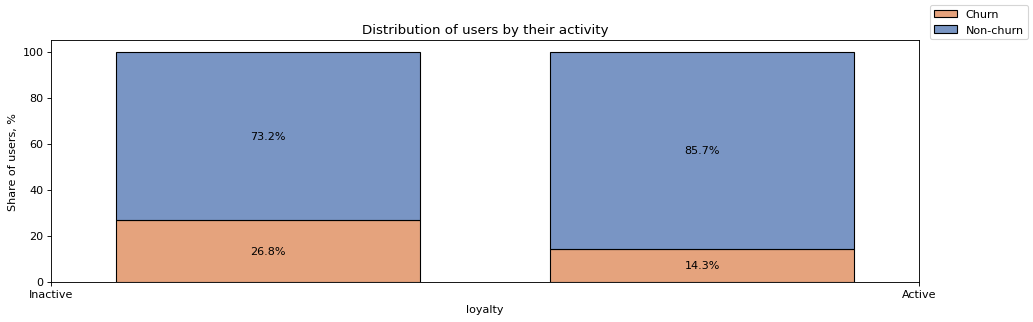

In [40]:
fig,axl = plt.subplots(figsize=(14, 4), dpi = 80)

ax = sns.histplot(df_loyalty_group,
             x='loyalty',
             hue='churn',
             weights='%',
             multiple='stack',
             bins=2,
             shrink=0.7,
             palette = ('deep'),
             legend = None
             )

plt.xticks([0,1],['Inactive','Active'])
plt.ylabel('Share of users, %')
plt.title('Distribution of users by their activity')

for c in ax.containers:
    ax.bar_label(c, fmt='%0.1f%%',label_type = 'center')
fig.legend(labels=['Churn','Non-churn'])
plt.show()

**Brief conclusions:**<br>
Among inactive users, a quarter converted to churn. It is worth considering the effectiveness of working with customer churn who have been inactive with the bank's products for some time.

### 4.3 Property ownership <a class="anchor" id="section4_3"></a>

In [41]:
# Adding supportive column with the number of objects
def obj_num(objects):
    if objects == 0:
        return '0'
    if objects == 1:
        return '1'
    if objects == 2:
        return '2'
    if objects == 3:
        return '3'
    if objects == 4:
        return '4'
    if objects == 5:
        return '5'
    if objects >5:
        return '>5'    
df['objects_group'] = df['objects'].apply(obj_num)

In [42]:
df_objects_group = table_percentage(['objects_group','churn'],df = df)
df_objects_group

,objects_group,churn,count,total,%
0,0,0,302,388,77.84
1,0,1,86,388,22.16
2,1,0,756,979,77.22
3,1,1,223,979,22.78
4,2,0,794,985,80.61
5,2,1,191,985,19.39
6,3,0,748,950,78.74
7,3,1,202,950,21.26
8,4,0,741,933,79.42
9,4,1,192,933,20.58


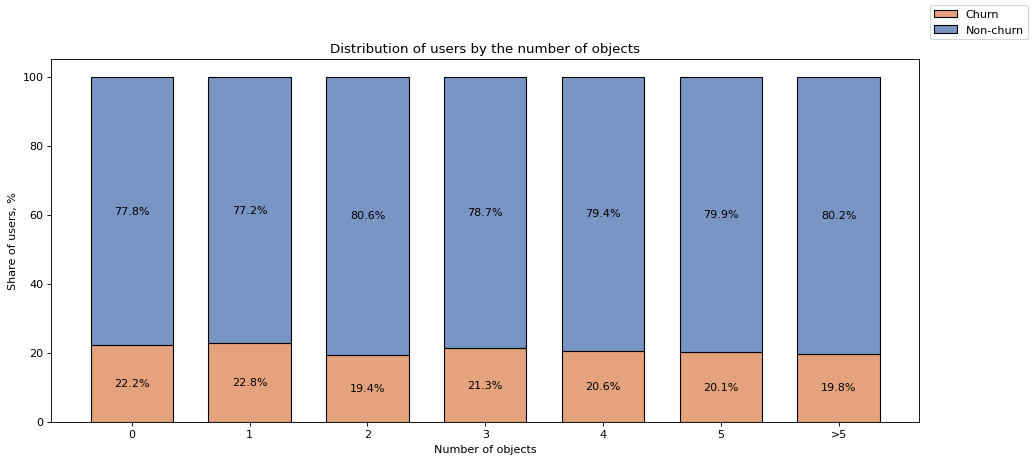

In [43]:
fig,axl = plt.subplots(figsize=(14, 6), dpi = 80)

ax = sns.histplot(df_objects_group,
             x='objects_group',
             hue='churn',
             weights='%',
             multiple='stack',
             shrink=0.7,
             palette = ('deep'),
             legend = None
             )

plt.xlabel('Number of objects')
plt.ylabel('Share of users, %')
plt.title('Distribution of users by the number of objects')

for c in ax.containers:
    ax.bar_label(c, fmt='%0.1f%%',label_type = 'center')
fig.legend(labels=['Churn','Non-churn'])
plt.show()

**Brief conclusions:**<br>
There are no particular retention patterns observed among users based on the absence or presence of property, regardless of the quantity.

### 4.4 Age grouping <a class="anchor" id="section4_4"></a>

Earlier we looked at the distribution of users in terms of retention and churn. Based on the previous analysis, we can identify the following age groups:

- Up to 30 years old;
- From 30 to 35 years old;
- From 35 to 40 years old;
- From 40 to 45 years old;
- From 45 to 60 years old;
- Over 60 years old;

In [44]:
# Adding supportive column with age groups
def age_num(age):
    if age < 30:
        return '<30'
    if age < 35:
        return '30-35'
    if age < 40:
        return '35-40'
    if age < 45:
        return '40-45'
    if age < 60:
        return '45-60'
    else:
        return '>60'

df['age_group'] = df['age'].apply(age_num)

In [45]:
# Grouping users by age groups and churn status
df_age_group = table_percentage(['age_group','churn'],df = df)
df_age_group['age_group'] = pd.Categorical(df_age_group['age_group'],['<30','30-35','35-40','40-45','45-60','>60'])
df_age_group

,age_group,churn,count,total,%
0,30-35,0,1764,1923,91.73
1,30-35,1,159,1923,8.27
2,35-40,0,1896,2185,86.77
3,35-40,1,289,2185,13.23
4,40-45,0,1226,1603,76.48
5,40-45,1,377,1603,23.52
6,45-60,0,875,1725,50.72
7,45-60,1,850,1725,49.28
8,<30,0,1434,1552,92.40
9,<30,1,118,1552,7.60


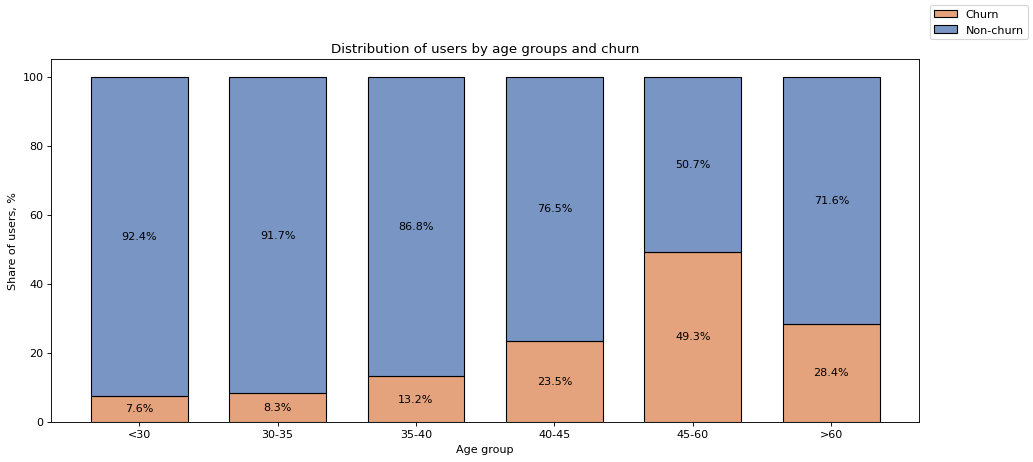

In [46]:
# Exploring distribution of users in different age groups by churn status
fig,axl = plt.subplots(figsize=(14, 6), dpi = 80)

ax = sns.histplot(df_age_group,
             x='age_group',
             hue='churn',
             weights='%',
             multiple='stack',
             shrink=0.7,
             palette = ('deep'),
             legend = None
             )

plt.xlabel('Age group')
plt.ylabel('Share of users, %')
plt.title('Distribution of users by age groups and churn')

for c in ax.containers:
    ax.bar_label(c, fmt='%0.1f%%',label_type = 'center')
fig.legend(labels=['Churn','Non-churn'])
plt.show()

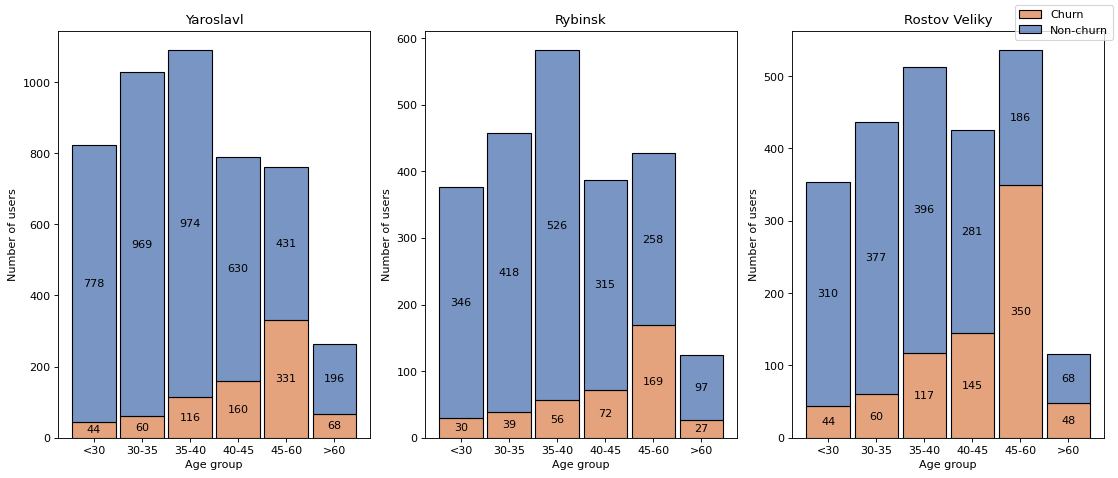

In [47]:
# Exploring distribution of users in different cities and age groups by churn status
fig,axl = plt.subplots(figsize=(14, 6), dpi = 80)

for i, city in enumerate(cities):
    
    df_sub = df.query('city == @city')
    df_sub = table_percentage(['age_group','churn'],df = df_sub)
    df_sub['age_group'] = pd.Categorical(df_sub['age_group'],['<30','30-35','35-40','40-45','45-60','>60'])
    
    ax = sns.histplot(df_sub,
             x='age_group',
             hue='churn',
             weights='count',
             multiple='stack',
             shrink=0.9,   
             ax = plt.subplot(1, 3, i + 1),
             legend = None,
             palette = ('deep')                      
             )
    
    plt.title(city)
    ax.set(xlabel='Age group',ylabel='Number of users')
    for c in ax.containers:
        ax.bar_label(c,label_type = 'center')
        
fig.legend(labels=['Churn','Non-churn'])

plt.tight_layout()       
plt.show()    

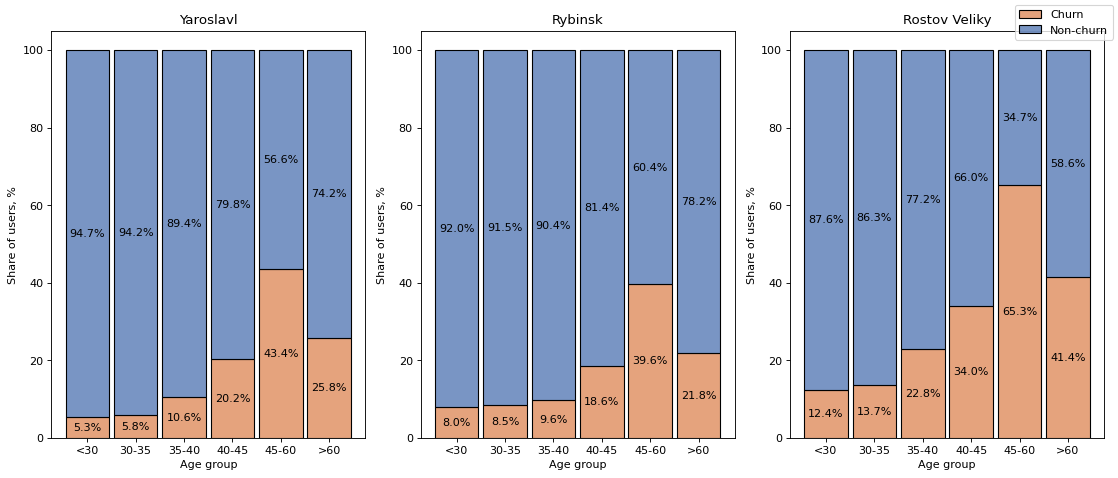

In [48]:
# Exploring distribution of users in different cities and age groups relatively by churn status
cities = df['city'].unique()
fig,axl = plt.subplots(figsize=(14, 6), dpi = 80)

for i, city in enumerate(cities):
    
    df_sub = df.query('city == @city')
    df_sub = table_percentage(['age_group','churn'],df = df_sub)
    df_sub['age_group'] = pd.Categorical(df_sub['age_group'],['<30','30-35','35-40','40-45','45-60','>60'])
    
    ax = sns.histplot(df_sub,
             x='age_group',
             hue='churn',
             weights='%',
             multiple='stack',
             shrink=0.9,   
             ax = plt.subplot(1, 3, i + 1),
             legend = None,
             palette = ('deep')                      
             )
    
    plt.title(city)
    ax.set(xlabel='Age group',ylabel='Share of users, %')
    for c in ax.containers:
        ax.bar_label(c, fmt='%0.1f%%',label_type = 'center')
        
fig.legend(labels=['Churn','Non-churn'])

plt.tight_layout()       
plt.show()    

**Brief conclusions:**<br>
1. The highest churn rate is observed in the age group "45-60". At the same time, the churn rate in the ">60" group is only slightly higher than in the "40-45" group. It is likely necessary to evaluate the product line with a focus on developing offerings for these groups.
2. Yaroslavl and Rybinsk have comparable churn rates by age groups, while in the city of Rostov Veliky the churn rate is significantly higher for all categories.

# 5. Hypothesis testing <a class="anchor" id="chapter5"></a>

### 5.1 Hypothesis of income difference between customers with one and two bank products <a class="anchor" id="section5_1"></a>

It is necessary to check for the presence of a statistically significant difference in income between customers with 1 and 2 bank products.
- **Null hypothesis:** there are no statistically significant differences in the average income level between customers with 1 and 2 bank products; 
- **Alternative hypothesis:** there are statistically significant differences in the average income level between customers with 1 and 2 bank products.

In [49]:
# Extracting users with 1 and 2 products into another dataset
df_1_2 = df.query("products == '1' | products == '2'")

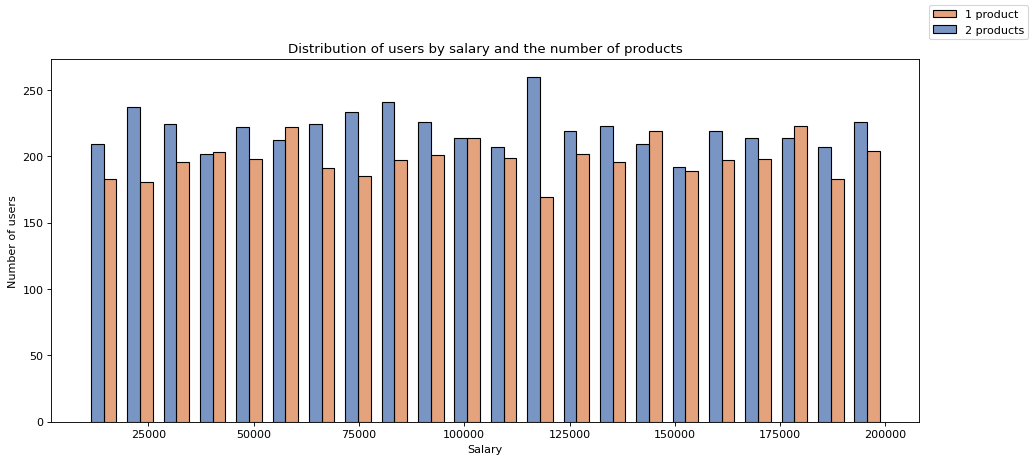

In [50]:
# Checking salary distribution
fig,axl = plt.subplots(figsize=(14, 6), dpi = 80)

ax = sns.histplot(df_1_2,
             x='estimated_salary',
             hue='products',
             multiple='dodge',
             shrink=0.7,
             palette = ('deep'),
             legend = None
             )

plt.xlabel('Salary')
plt.ylabel('Number of users')
plt.title('Distribution of users by salary and the number of products')
fig.legend(labels=['1 product','2 products'])
plt.show()

In [51]:
# Dividing samples
products_1 = df.query("products == '1'")['estimated_salary']
products_2 = df.query("products == '2'")['estimated_salary']

print('1 product users sample size:', len(products_1))
print('Variance of salary among users with 1 product:', np.var(products_1, ddof=1))
print('Standart deviation:', np.sqrt(np.var(products_1, ddof=1)),'\n')
print('2 products users sample size:', len(products_2))
print('Variance of salary among users with 2 product:', np.var(products_2, ddof=1))
print('Standart deviation:', np.sqrt(np.var(products_2, ddof=1)))

1 product users sample size: 4834
Variance of salary among users with 1 product: 2975040793.046221
Standart deviation: 54543.93452113828 

2 products users sample size: 4350
Variance of salary among users with 2 product: 2990166049.407382
Standart deviation: 54682.41078635233


When comparing the means of two populations, we will use a t-test. The sample sizes are large enough but not equal. The variance is slightly different. To conduct the test, we will use **Welch's t-test**.

In [52]:
alpha = 0.05 # statistical significance 
# if p-value is below - reject null hypothesis

results = st.ttest_ind(products_1, products_2, equal_var=False)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Rejecting null hypothesis')
else:
    print('Could not reject null hypothesis') 

p-value: 0.2332612813944658
Could not reject null hypothesis


**Brief conclusions:**<br>
1. The probability of obtaining differences in means by chance is about 23%, which does not allow us to reject the hypothesis of no difference. 
2. We should not expect users with different income levels to be more willing to purchase additional bank products.

### 5.2 Hypothesis of income difference between churned and active customers <a class="anchor" id="section5_2"></a>

It is necessary to check for the presence of a statistically significant difference in income between churned and retained users.
- **Null hypothesis:** there are no statistically significant differences in the average income level between churned and retained users; 
- **Alternative hypothesis:** there are statistically significant differences in the average income level between churned and retained users.

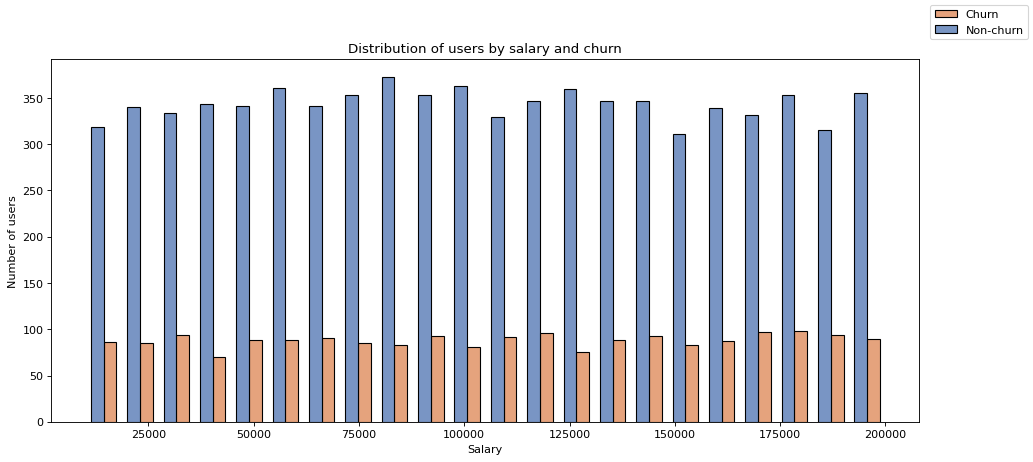

In [53]:
# Checking distribution of salaries
fig,axl = plt.subplots(figsize=(14, 6), dpi = 80)

ax = sns.histplot(df,
             x='estimated_salary',
             hue='churn',
             multiple='dodge',
             shrink=0.7,
             palette = 'deep',
             legend = None
             )

plt.xlabel('Salary')
plt.ylabel('Number of users')
plt.title('Distribution of users by salary and churn')
fig.legend(labels=['Churn','Non-churn'])
plt.show()

In [54]:
# Dividing samples and checking variance
churn_users = df.query("churn == 1")['estimated_salary']
not_churn_users = df.query("churn == 0")['estimated_salary']

print('Churn sample:', len(churn_users))
print('Variance of salary among churn users:', np.var(churn_users, ddof=1))
print('Standard Deviation:', np.sqrt(np.var(churn_users, ddof=1)),'\n')
print('Non-churn sample:', len(not_churn_users))
print('Variance of salary among non-churn users:', np.var(not_churn_users, ddof=1))
print('Standard Deviation:', np.sqrt(np.var(not_churn_users, ddof=1)))

Churn sample: 1936
Variance of salary among churn users: 3019199776.3249817
Standard Deviation: 54947.245393422425 

Non-churn sample: 7556
Variance of salary among non-churn users: 2961907769.902244
Standard Deviation: 54423.41196490941


When comparing the means of two populations, we will use a t-test. The sample sizes are large enough but not equal. The variances are fairly close. To conduct the test, we will use the **Welch's t-test**.

In [55]:
alpha = 0.05 # statistical significance 
# if p-value is below - reject null hypothesis

results = st.ttest_ind(churn_users, not_churn_users, equal_var=False)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Rejecting null hypothesis')
else:
    print('Could not reject null hypothesis') 

p-value: 0.2396252353637028
Could not reject null hypothesis


**Brief conclusions:**<br>
1. The probability of obtaining differences in the means by chance is about 24%, which does not allow us to reject the hypothesis of the absence of differences;
2. It is not expected that users with different income levels are more likely to churn or stay.

### 5.3 Hypothesis of the impact of property ownership on a customer's credit score <a class="anchor" id="section5_3"></a>

It is necessary to check for the presence of statistically significant differences in scoring between users with and without property.<br>
- **Null hypothesis:** there are no statistically significant differences in the average level of scoring between users with and without property;
- **Alternative hypothesis:** there are statistically significant differences in the average level of scoring between users with and without property.

In [56]:
# Adding supportive column with ownership attribute
def owner(objects):
    if objects == 0:
        return 'not owner'
    else:
        return 'owner'

df['owner'] = df['objects'].apply(owner)

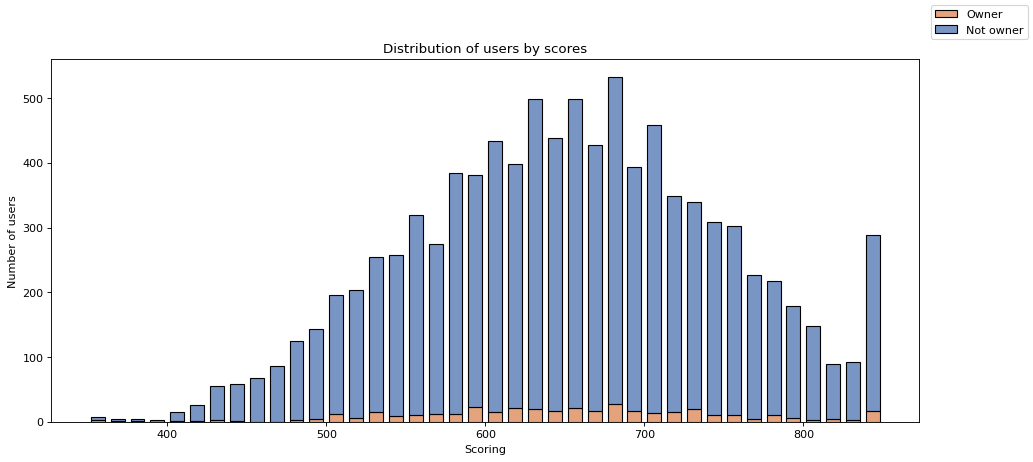

In [57]:
# Checking distribution of scores
fig,axl = plt.subplots(figsize=(14, 6), dpi = 80)

ax = sns.histplot(df,
             x='score',
             hue='owner',
             multiple='stack',
             shrink=0.7,
             palette = 'deep',
             legend = None
             )

plt.xlabel('Scoring')
plt.ylabel('Number of users')
plt.title('Distribution of users by scores')
fig.legend(labels=['Owner','Not owner'])
plt.show()

In [58]:
# Dividing samples and checking variance
owner_users = df.query("owner == 'owner'")['score']
not_owner_users = df.query("owner == 'not owner'")['score']

print('Owners sample size:', len(owner_users))
print('Variance of scoring among owners:', np.var(owner_users, ddof=1))
print('Standard Deviation:', np.sqrt(np.var(owner_users, ddof=1)),'\n')
print('Non-owners sample size:', len(not_owner_users))
print('Variance of scoring among non-owners:', np.var(not_owner_users, ddof=1))
print('Standard Deviation:', np.sqrt(np.var(not_owner_users, ddof=1)))

Owners sample size: 9104
Variance of scoring among owners: 9336.976572884776
Standard Deviation: 96.62803202427739 

Non-owners sample size: 388
Variance of scoring among non-owners: 9323.523928447748
Standard Deviation: 96.55839646787715


When comparing the means of two populations, we will use a t-test. The sample sizes are large enough, but they differ significantly in size. The variance is almost equal. To conduct the test, we will use the **Welch's t-test.**

In [59]:
alpha = 0.05 # statistical significance 
# if p-value is below - reject null hypothesis

results = st.ttest_ind(owner_users, not_owner_users, equal_var=False)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Rejecting null hypothesis')
else:
    print('Could not reject null hypothesis') 

p-value: 0.8398020362800628
Could not reject null hypothesis


**Brief conclusions:**<br>
1. The probability of obtaining differences in means by chance is around 84%, which does not allow us to reject the null hypothesis of no differences.
2. Users with property ownership do not differ in scoring from users without property ownership.

# 6. Results and recommendations <a class="anchor" id="chapter6"></a>

#### Summary:
The analysis conducted allowed to identify the basic characteristics of the users of Metanprombank, as well as to make assumptions about the reasons for customer churn and formulate proposals for churn management.
The main characteristics of users that affect their behavior are geographic location, number of products, and age group.

### Segmentation of users by the number of products:
**Description:** As the number of products exceeds 2, users show a strong increase in churn rate across all cities:
* **1 product:** a larger number of users in all cities (4834). On average, churn in this group is 27.7%, about 22% in Yaroslavl and Rybinsk, and 42% in the city of Rostov Veliky.
* **2 products:** 4350 users. Such users are less prone to churn: 6% and 7% in Yaroslavl and Rybinsk, respectively, 12% in the city of Rostov Veliky.
* **3 products:** 251 users. A sharp increase in churn compared to 2 products: 78% and 79% in Rybinsk and Yaroslavl, respectively, 89% in the city of Rostov Veliky.
* **4 products:** less than 1% of users (57). All users in this segment have churned.

**Recommendation:** 
1. Check which products users purchase as add-ons to identify the reasons for high churn among customers with 3 and 4 products. Such an effect may be caused by low-quality bundle products, user overload with unnecessary products, and negative experience.
2. Compare categories of users with 1 and 2 products to determine what causes users with 2 products to be better retained.

## Other segments.
### Segment "Users over 45 years old":
**Description:** They tend to churn, and one of the factors may be the need to have a non-zero balance. In the city of Rostov Veliky, for an unknown reason, there are no users with a zero balance, and the city has the highest churn rate, which is exacerbated in older age groups.

**Recommendation:** if possible, expand the product line of Yaroslavl/Rybinsk to Rostov Veliky and consider age-specific offers.


### Segment "Users from Yaroslavl":
**Description:** People of both genders aged 30-45 who use credit cards and own property. <br>

**Recommendation:** similar recommendations as for the segments by number of products and **"Users over 45 years old"**.

**Other features:**
- The largest number of clients **(50% of bank users)**;
- The average age of users is about **38.5 years**, 0.5-1 year younger than in other cities. The majority of users are aged **27-40**;
- Strong churn among users in the **"45-60 years"** age group, as well as noticeable churn in the **"40-45 years"** and **">60 years"** groups. Churn in the city is **16.4%**, comparable to Rybinsk and twice as low as in Rostov Veliky;
- Distribution of men and women among users: **55%/45%**;
- Average credit rating: **650**, about **70%** of users have a credit card;
- Average user balance: **62.6 thousand rubles.** A significant number of users do not have a balance.
- On average, there are about **5 objects per user**, and the number of users without objects is insignificant.


### Segment "Users from Rostov Veliky":  
**Description:** People of both genders aged 35-60 with a high churn rate who use credit cards, own property, and maintain a non-zero balance on their account. <br>

**Recommendation:** Compare the product line with Yaroslavl and Rybinsk. If there are differences, analyze the feasibility of transferring the product lines from Yaroslavl and Rybinsk with a lower churn rate. It is possible that the lack of products that do not require a balance is leading to a sharp increase in churn.

**Other features:**
- Shares popularity with Rybinsk **(25% of bank users)**;
- The average age of users is about **40 years**, the highest among other cities. The category of users **"45-60 years old"** predominates, most of whom have churned;
- Churn rate is significantly higher across all age categories than in other cities. On average, churn rate is **32%**;
- Distribution of men and women among users: **53%/47%**;
- Average credit rating: **652**, about **72%** of users have a credit card;
- Average user balance: **119.8 thousand rubles.** The distinctive feature of the city is the absence of users with zero balance;
- On average, each user has about **5 objects**, and the number of users without objects is negligible.


### Segment "Users from Rybinsk":  
**Description:** People of both genders aged up to 40 years who use credit cards and own property. <br>

**Recommendation:** Similar recommendations as for segments based on the number of products and "Users older than 45".

**Other features:**
- Shares popularity with the city of Rostov Veliky **(25% of bank users)**;
- The average age of users is about **39 years**. The majority of users are aged **27-40 years**;
- There is a significant churn of users in the **"45-60 years"** group, as well as noticeable churn in the **"40-45 years"** group. The churn rate in the city is **16.7%**, which is comparable to Yaroslavl and two times lower than Rostov Veliky;
- The distribution of men and women among users is **56%/44%**;
- The average credit rating is **652**, and about **70%** of users have a credit card;
- The average user balance is **62,000 rubles**. There are a significant number of users who do not have a balance;
- On average, each user has about **5 objects**, and the number of users without objects is insignificant.